In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import pathlib

import os
import gc
print(os.listdir("/Users/artyomarnaut/Documents/OverwatchRecognize"))

from sklearn.metrics import confusion_matrix
from fastai import *
from fastai.vision import *

['.DS_Store', 'Untitled.ipynb', 'heroes', '.ipynb_checkpoints']


In [2]:
DATA_DIR='/Users/artyomarnaut/Documents/OverwatchRecognize/heroes'
os.listdir(f'{DATA_DIR}')

['zarya',
 'widowmaker',
 'reinhardt',
 'tracer',
 'ana',
 'orisa',
 'hanzo',
 'mccree',
 'zenyatta',
 'genji',
 'torbjorn',
 'lucio',
 'mercy',
 'bastion',
 'sombra',
 'brigitte',
 'pharah',
 'mei',
 'd.va',
 'junkrat',
 'soldier76',
 'reaper',
 'moira',
 'roadrog',
 'doomfist',
 'baptiste',
 'winston',
 'symmetra']

In [3]:
torch.cuda.is_available()

False

In [4]:
data = ImageDataBunch.from_folder(DATA_DIR, train=".", 
                                  valid_pct=0.2,
                                  ds_tfms=get_transforms(flip_vert=True, max_warp=0),
                                  size=224,bs=64, 
                                  num_workers=0).normalize(imagenet_stats)

In [5]:
print(f'Classes: \n {data.classes}')

Classes: 
 ['ana', 'baptiste', 'bastion', 'brigitte', 'd.va', 'doomfist', 'genji', 'hanzo', 'junkrat', 'lucio', 'mccree', 'mei', 'mercy', 'moira', 'orisa', 'pharah', 'reaper', 'reinhardt', 'roadrog', 'soldier76', 'sombra', 'symmetra', 'torbjorn', 'tracer', 'widowmaker', 'winston', 'zarya', 'zenyatta']


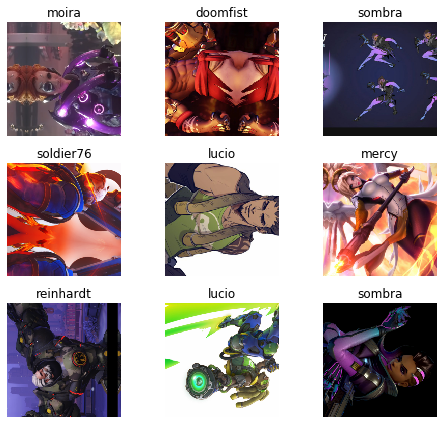

In [6]:
data.show_batch(rows=3, figsize=(7,6))

In [7]:
learn = create_cnn(data, models.resnet34, metrics=accuracy, model_dir="/tmp/model/")

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/fastai/vision/learner.py:106: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


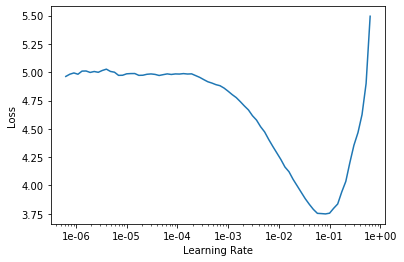

In [8]:
learn.lr_find()
learn.recorder.plot()

In [9]:
learn.fit_one_cycle(6,1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,3.535393,1.300713,0.631929,14:15
1,2.444267,1.746172,0.565410,14:15
2,2.000760,1.621232,0.614191,14:10
3,1.638930,1.091218,0.698448,14:11
4,1.312904,0.900660,0.727273,14:15
5,1.075969,0.838401,0.747228,14:17


In [10]:
learn.save('stage-1')

In [11]:
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


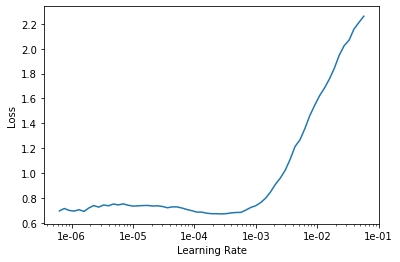

In [12]:
learn.lr_find()
learn.recorder.plot()

In [13]:
learn.fit_one_cycle(4, max_lr=slice(1e-6,1e-4 ))

epoch,train_loss,valid_loss,accuracy,time
0,0.722009,0.824651,0.745011,18:06
1,0.724775,0.793898,0.762749,18:09
2,0.691463,0.777151,0.762749,17:59
3,0.672056,0.766338,0.771619,18:03


In [14]:
learn.save('stage-2')

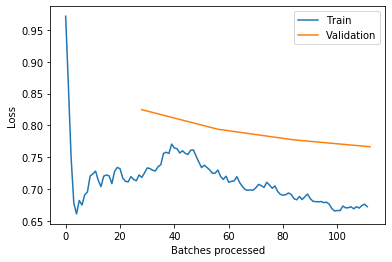

In [15]:
learn.recorder.plot_losses()

In [16]:
interp = ClassificationInterpretation.from_learner(learn)

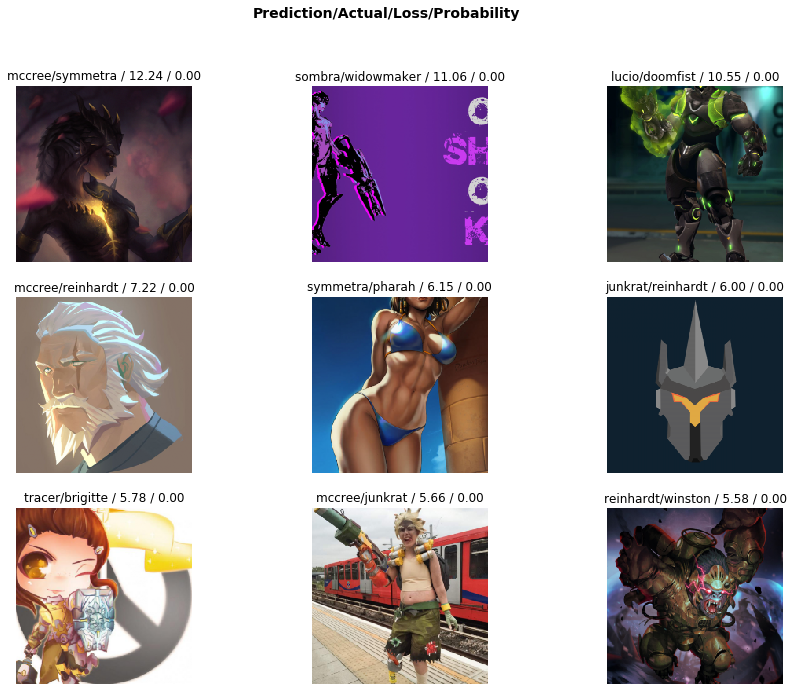

In [17]:
interp.plot_top_losses(9, figsize=(15,11))

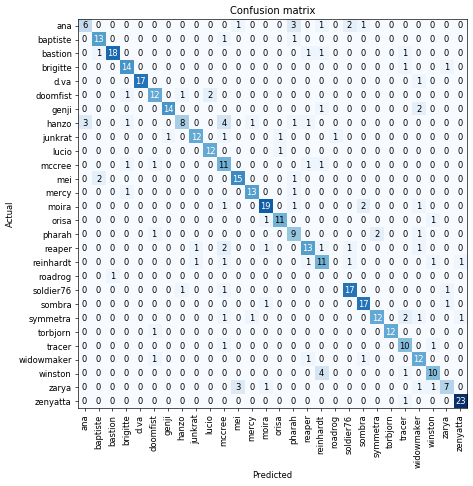

In [18]:
interp.plot_confusion_matrix(figsize=(8,8), dpi=60)